In [ ]:
from google.colab import files
 
files.upload()

# Regresión logística con Scikit-Learn

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (variable que puede adoptar un número limitado de categorías o etiquetas) en función de las variables independientes o predictoras.

En este caso supongamos que tenemos un cierto número de pacientes con ciertas características que nos van a permitir determinar si determinado paciente tiene diabetes o no. 

Adicionalmente, la información con la que tendremos que trabajar para este caso tendrá que estar previamente ordenada o "limpia".


In [5]:
import pandas as pd
from sklearn import metrics # Para validar el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carguemos el dataset

In [6]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
dataset.shape

(768, 9)

### Obtenemos las columnas

In [32]:
feature_cols = [i for i  in dataset.columns ]
feature_cols.remove('Outcome')
print(feature_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### Creamos nuestras variables

In [34]:
X = dataset[feature_cols]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
y = dataset.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Dividimos datos de entrenamiento y de prueba

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 0 )

### Llamamos al modelo

In [37]:
# Ajustamos el maximo de iteraciones para que no salga un Warning
log_reg = LogisticRegression(max_iter=1000)

### Entrenamos el modelo

In [38]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Score

In [40]:
log_reg.score(X_train, y_train)

0.7604166666666666

In [41]:
log_reg.score(X_test, y_test)

0.8020833333333334

Al parecer obtuvimos buenos resultados.

In [44]:
# Obtenemos los valores predichos
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

### Evaluando con una matriz de confusión

#### Generamos nuestra matriz de confusión

In [45]:
# Recibe 2 paráetros, la información que usamos para testear y la predicción que arrojó el modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Vamos a hacerlo un poco más visual


Text(0.5, 15.0, 'Etiqueta de predicción')

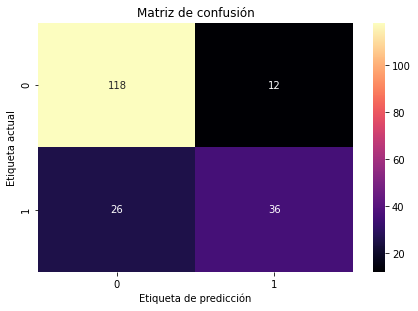

In [47]:
# seaborn,heatmap nos ayuda a trazar los datos en forma de matriz como buscamos
# Crea un DataFrame a partir de la matriz de confusión
# https://seaborn.pydata.org/generated/seaborn.heatmap.html --> Para ver el resto de parámetros
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'magma', fmt = 'g') # cmap nos ayuda a extablecer los colores

# Ajustamos la posición de los labels
ax.xaxis.set_label_position('top')
# Ajuste el relleno entre y alrededor de los subplots.
plt.tight_layout()

# Le ponemos el titulo y las etiquetas de los ejes
plt.title('Matriz de confusión', y = 1.1) # Empezamos en la posición 1.1
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

In [50]:
print('Exactitud:', round( metrics.accuracy_score(y_test, y_pred), 3) )

Exactitud: 0.802


---